<font size="6"><b>Product Range analysis</b></font>

We are an Analyst of on-line store and we need to analyze the store's product range.

**The purposes of the analysis:**
- Identify the unique products, calculate the total number of unique products and explore their diversity
- Examine the top-selling products based on the quantity sold and total revenue generated
- Identify the most common product categories
- Analyze the distribution of prices across different products

**We will use the following sources:**
1. [Pandas Documentation](https://pandas.pydata.org/docs/): Comprehensive documentation on using Pandas for data analysis and manipulation.

Helps with loading the dataset, handling missing values, and exploring data using Pandas functions.

2. [Seaborn Documentation](https://seaborn.pydata.org/): Documentation for Seaborn, a Python data visualization library.

Assists in creating informative and visually appealing visualizations to explore the dataset.

3. [Scipy Documentation](https://docs.scipy.org/doc/): Documentation for Scipy, a scientific computing library in Python.

Provides guidance on statistical tests and hypothesis testing.

4. [Tableau Help and Documentation](https://help.tableau.com/): Official help and documentation for Tableau software.

Assists in creating interactive dashboards

5. [Towards Data Science](https://towardsdatascience.com/): Online platform for sharing data science and machine learning articles.

Provides a wide range of articles on various data science topics, including data analysis, visualization, and statistical techniques.

**Additional links to brief Presentation with the results of the analysis and to Dashboard in Tableau:**

[Dashboard in Tableau](https://public.tableau.com/app/profile/alexander.erlikhman/viz/Productrange/Productrangeanalysis?publish=yes)
- In Tableau we are using row data without treated item discriptions. Some graphs are differ.

[Presenatation with the results of the analysis](https://drive.google.com/file/d/1qT_7SJie3a0vmjGrs4_4Al9wwXCHP2v4/view?usp=sharing)


# Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats as st
from functools import reduce
import sidetable
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Loading data

In [2]:
# Load the data file
path = 'E:\\Израиль\\Practicum\\Final project\\'

try:
    df = pd.read_csv('/datasets/ecommerce_dataset_us.csv', sep='\t')
except FileNotFoundError:
    df = pd.read_csv(path+'ecommerce_dataset_us.csv', sep='\t')

## Explore initial data

The dataset includes the following fields:
- `InvoiceNo` - order identifier
- `StockCode` - item identifier
- `Description` - item name
- `Quantity` - quantity of the item
- `InvoiceDate` - order date
- `UnitPrice` - price per item
- `CustomerID`- identifier of the customer 

In [3]:
# printing the general/summary information about df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [4]:
# print a sample of data from df
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


In [5]:
# print a sample of data from df
df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/07/2019 12:50,0.85,12680.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/07/2019 12:50,2.10,12680.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/07/2019 12:50,4.15,12680.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/07/2019 12:50,4.15,12680.0
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/07/2019 12:50,4.95,12680.0


In [6]:
# print a sample of data from df
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
433646,573945,23323,WHITE WICKER STAR,6,10/31/2019 10:44,2.10,17663.0
430583,573585,22263,FELT EGG COSY LADYBIRD,1,10/29/2019 14:41,1.63,NaN
401111,571425,23271,CHRISTMAS TABLE SILVER CANDLE SPIKE,16,10/15/2019 12:41,0.83,14911.0
346469,567185,22632,HAND WARMER RED RETROSPOT,2,09/16/2019 15:55,2.10,16370.0
355064,567904,23421,PANTRY HOOK SPATULA,12,09/20/2019 16:34,2.08,12609.0


Most of the column types are correct, we see that `Quantity` column is integer and `UnitPrice` is float. We need just to change the type of `InvoiceDate` column to date time type. Also, We have missing values in 2 columns: `Description` and `CustomerID`. As we will analyze the product range we don't need any information about customers, so we can drop this column. We will find out how to treat `Description` column during the preprocessing stage of the project. We will change column names to the lower case and add underscore for better view.

# Data preprocessing

Let's start with dropping `CustomerID` column and change the column names 

In [7]:
# Dropping 'CustomerID' column
df = df.drop('CustomerID', axis=1)

# Changing column names
df = df.rename(columns={'InvoiceNo':'invoice_no', 'StockCode':'stock_code', 
                        'InvoiceDate':'invoice_date', 'UnitPrice':'unit_price'})

# Changing the rest of the columns to lower case
df.columns = df.columns.str.lower()

# Check the result
df.sample(5)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price
2024,536552,20950,NaN,1,11/29/2018 14:34,0.00
317913,564818,23242,TREASURE TIN BUFFALO BILL,1,08/28/2019 12:10,4.13
267252,560291,85123a,WHITE HANGING HEART T-LIGHT HOLDER,3,07/16/2019 10:17,6.63
109582,545654,23194,GYMKHANNA TREASURE BOOK BOX,8,03/02/2019 13:46,2.08
420098,572872,21888,BINGO SET,2,10/24/2019 13:27,3.75


We have successfully changed the column names and dropped the `CustomerID` column. Now let's change the 'invoice_date' to date time type.

In [8]:
# Changing 'invoice_date' column to date time type
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%m/%d/%Y %H:%M')

# Check the result
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39


We have successfully changed `invoice_date` column to date time type. Now let's look at the missing values more carefully  

In [9]:
# Look for missing values
df.stb.missing(style=True)

,missing,total,percent
description,"1,454","541,909",0.27%
invoice_no,0,"541,909",0.00%
stock_code,0,"541,909",0.00%
quantity,0,"541,909",0.00%
invoice_date,0,"541,909",0.00%
unit_price,0,"541,909",0.00%


We have just very small number of missing values in `description` column. In the same time we have `stock_code` column where we have item code. Let's check how many descriptions do we have for each stock code. If we have more than 1 description for each item we can try to treat the missing descriptions using other descriptions of the same stock code

In [10]:
# Group by df with stock_code column to get the number of descriptions for each code
df.groupby('stock_code')['description'].count().reset_index().head(10)

,stock_code,description
0,10002,71
1,10080,23
2,10120,30
3,10123C,3
4,10123G,0
5,10124A,5
6,10124G,4
7,10125,94
8,10133,200
9,10134,0


As expected there can be many descriptions for each code. Let's see how many unique descriptions we have 

In [11]:
# Group by df with stock_code column to get the number of unique descriptions for each code
df.groupby('stock_code')['description'].nunique().reset_index().head(10)

,stock_code,description
0,10002,1
1,10080,2
2,10120,1
3,10123C,1
4,10123G,0
5,10124A,1
6,10124G,1
7,10125,1
8,10133,2
9,10134,0


There can be more than one description, but their number is small. So we can create a dictionary with descriptions for each stock code using the most common description and try to treat missing values. In case there is no description fore some items we will set the value 'no description' to the `description` column. Let's do this

In [12]:
# Creating function ti get most common description
def description(x):
    if x.empty:
        return 'No description'
    else:
        value_counts = x.value_counts()
        if len(value_counts) > 0:
            return value_counts.index[0]
        else:
            return 'no description'

# Apply the function to the df
desc_dict = df.groupby('stock_code')['description'].apply(description).to_dict()

# Replacing missing values in `description` column with the values from desc_dict
df['description'] = df.apply(lambda x: desc_dict[x['stock_code']], axis=1)

#Check the number of missing values
df.stb.missing(style=True)

,missing,total,percent
invoice_no,0,"541,909",0.00%
stock_code,0,"541,909",0.00%
description,0,"541,909",0.00%
quantity,0,"541,909",0.00%
invoice_date,0,"541,909",0.00%
unit_price,0,"541,909",0.00%


In [13]:
# Check the number of values where we don't have any description
df.query('description=="no description"').shape[0]

112

We have successfully treated the most of missing descriptions, but still we have 112 items where we don't have any. Let's look what values we have in our data for such items

In [14]:
# Filtering the tble where ther is no description
df.query('description=="no description"').sample(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price
346849,567207,35592T,no description,4,2019-09-17 11:01:00,0.0
171579,551435,20825,no description,-5,2019-04-26 15:08:00,0.0
171720,551446,35594,no description,-4,2019-04-26 15:58:00,0.0
145259,548889,84875A,no description,-17,2019-04-02 15:26:00,0.0
75292,542579,90000C,no description,-1,2019-01-26 14:57:00,0.0
171714,551442,85060,no description,-4,2019-04-26 15:50:00,0.0
21791,538142,84247C,no description,1,2018-12-07 15:58:00,0.0
75234,542558,35644,no description,-1,2019-01-26 14:51:00,0.0
150148,549330,84251J,no description,-28,2019-04-06 10:53:00,0.0
281615,561555,37477B,no description,-11,2019-07-26 10:21:00,0.0


We have negative values in quantity column and unit price equals 0. May be it is return of some items. Let's check whether all values here are negative

In [15]:
# Check if all quantities where there is no description are negative
df.query('description=="no description" and quantity >0').shape[0]

15

We have 15 items with positive quantities. Le's look if all prices here are 0

In [16]:
# Check if all prices equal 0 where there is no description are negative
df.query('description=="no description" and unit_price !=0').shape[0]

0

Yes, all the prices are zeros where there is no description for a item. So, e will leave it as it is for now and investigate it during the EDA.
For now, we have successfully performed the preprocessing stage. We dropped `CustomerID` column as it is not relevant for our analysis, changed the column names to lower case and added under score, changed invoice_date column to date time type and treated the most of the missing values in `description` column. Now we can start an exploratory data analysis

# EDA
Let's look at the distribution of unit_price and its summary statistics and build a histogram

In [17]:
# Look at  sunnamry statistics of `unit_price` column
df.unit_price.describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: unit_price, dtype: float64

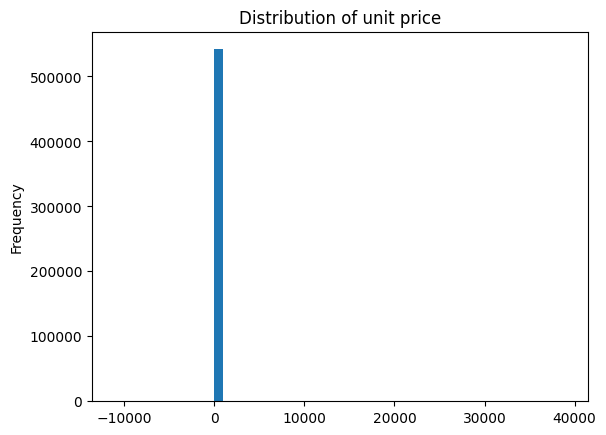

In [18]:
# Building hustogram for `unit_price` column
df['unit_price'].plot.hist(bins=50)
plt.title('Distribution of unit price')
plt.show()

The majority of our items have just small prices. let's find 1 and 99 percentiles 

In [19]:
# Finding 1 and 99 percentiles for unit prices
print(f'''Less than 1% of the items have a price less than {np.percentile(df.unit_price, 1)},
Less than 1% of the items have a price more than than {np.percentile(df.unit_price, 99)}.''')

Less than 1% of the items have a price less than 0.19,
Less than 1% of the items have a price more than than 18.0.


We see that all negative values and large positive values are anomalies. Let's build a histogram to see the main distribution of unit price without such anomalies.

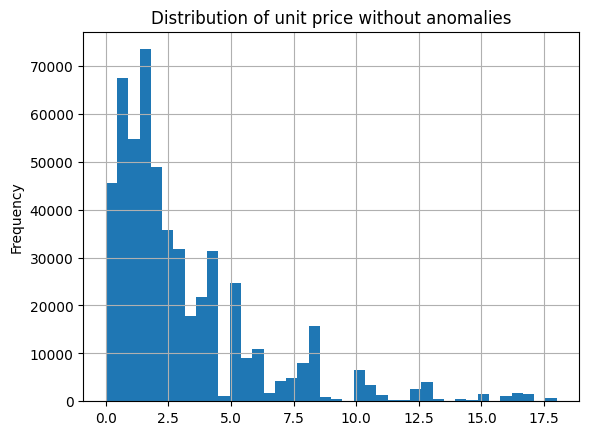

In [20]:
# Building hustogram for `unit_price` column without anomalies
df['unit_price'].plot.hist(bins=40, range=(0, 18))
plt.title('Distribution of unit price without anomalies')
plt.grid()
plt.show()

We see that our distribution is strongly skewed to the right. More than a half of the items have just price about 2 USD. And the mean price is more than a median. It is 4.6 usd because of some high values.

Let's apply the same approach to look at the distribution of the quantities

In [21]:
# Look at  sunnamry statistics of `quantity` column
df.quantity.describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: quantity, dtype: float64

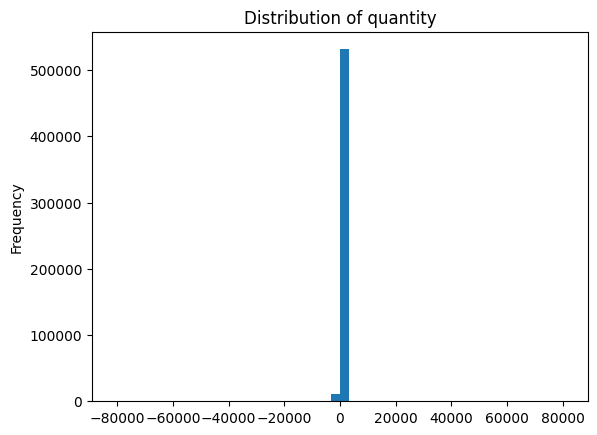

In [22]:
# Building hustogram for `quantity` column
df['quantity'].plot.hist(bins=50)
plt.title('Distribution of quantity')
plt.show()

Almost the same picture here. The difference is that we have very large negative and positive values here

In [23]:
# Finding 1 and 99 percentiles for quantity
print(f'''Less than 1% of the items have a quantuty less than {np.percentile(df.quantity, 1)},
Less than 1% of the items have a quantity more than than {np.percentile(df.quantity, 99)}.''')

Less than 1% of the items have a quantuty less than -2.0,
Less than 1% of the items have a quantity more than than 100.0.


We found the limits. Let's look at the distribution of the main quantities 

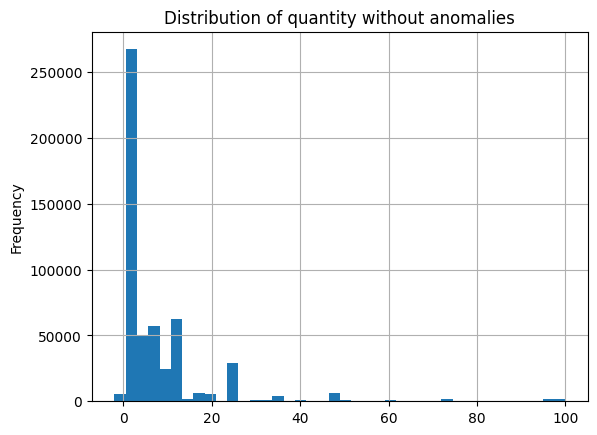

In [24]:
# Building hustogram for `quantity` column without anomalies
df['quantity'].plot.hist(bins=40, range=(-2, 100))
plt.title('Distribution of quantity without anomalies')
plt.grid()
plt.show()

The most common quantity for orders is just 1-2 items. That make sense. More than half of the items are being sold in quantities less than 3. The mean is 9.5 but it is affected of the anomalies which are possibly the mistakes in our data. Let's count how many rows do we lose if we filter our data with such limits.  

In [25]:
# Culculate number of anomalies
condition='(unit_price <0 or unit_price > 18 or quantity < -2 or quantity >100)'
anomalies = df.query(condition).shape[0]

# Printing the result
print(f'''If we filter the anomalies we will lose {anomalies} rows,
It is {anomalies/len(df):.1%} of the original data''')

If we filter the anomalies we will lose 14773 rows,
It is 2.7% of the original data


It is acceptable to filter the data with such condition. We will still have more than 95% of the data. And that anomalies are possible some damage of the data. Let's filter the data in order to get the clearer picture. 

In [26]:
# Filtering the data with from the quantity and unit price anomalies
filt_condition = 'not '+condition
df_filt = df.query(filt_condition)

# Printing summary statisitics of the filtered data
df_filt.describe()

,quantity,unit_price
count,527136.000000,527136.000000
mean,7.906212,3.143077
std,12.585791,3.012970
min,-2.000000,0.000000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,100.000000,18.000000


Now we see that mean values became less for both item price and quantity as they are less affected by the large values. 
More than a half of the items have just price about 2 USD and quantity 3. And the mean price is 3.1 USD, mean quantity is 8. Both distributions are strongly skewed to the right. We have some 0 prices, possibly because of discounts or promotions (buy something and get a gift for example) and we have some negative quantities which can be return of some items.

Now, let's analyze the data's temporal aspect by examining the distribution of purchases (we will count the invoices) over time using line plot. Let's see what data range we have in our data first

In [27]:
# Printing the data range of the df_filt
print(f'We have data from {df_filt.invoice_date.min()} to {df_filt.invoice_date.max()}')

We have data from 2018-11-29 08:26:00 to 2019-12-07 12:50:00


So we have data for a year and we can sum up weekly invoices and plot a line graph with a trend line 

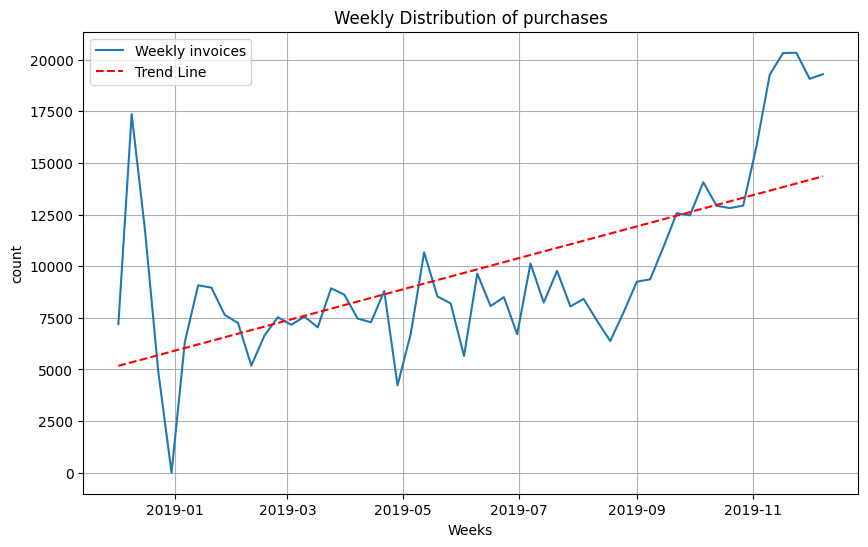

In [28]:
# Group by week and count the number of purchases
purchase_counts_week = df_filt.resample('W', on='invoice_date')['invoice_no'].count()

# Create line plot
plt.figure(figsize=(10, 6))
plt.plot(purchase_counts_week.index, purchase_counts_week.values, label='Weekly invoices')
plt.xlabel('Weeks')
plt.ylabel('count')
plt.title('Weekly Distribution of purchases')
plt.xticks()
plt.grid()

# Calculate trend line
x = np.arange(len(purchase_counts_week))
y = purchase_counts_week.values
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Plot trend line
plt.plot(purchase_counts_week.index, p(x), color='red', linestyle='--', label='Trend Line')
plt.legend()

plt.show()

We see that we have Christmas peak in December and then we have drop to zero in the end of the 2018. So it is obviously holidays. We have data just for the beginning of the December 2019, so we also see the growth of the number of invoices in the beginning of December 2019. Nevertheless We have very positive trend in the full 2019 year. In the beginning of the January we had 5000 invoices weekly, and in November we have already 15000 invoices weekly. And the mane growth was in the autumn 2019. From January to September the number of invoice was fluctuating between 5 and 10 thousand per week, and from the September till December we wee the growth to 15000. So at least at 50%. It is very good. Later we will examine the revenue as well.
# Product Range Analysis
Let's find out how many unique products we have and how many unique descriptions we have for each unique product. We will use group by method for that task

In [29]:
#Calculating unique products and number of unique descriptions
products = df_filt.groupby('stock_code')['description'].nunique().reset_index()

# Output the lenth of the products table
products.shape[0]

3953

Almost 4000 unique products. We have plenty of products. Let's print summary statistics of the descriptions

In [30]:
# Pritn suumary statisics of products table
products.describe()

,description
count,3953.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


So we have just one description for each unique product. That's good. We can use description as index for products for better understanding what products we have. Let's analyse the distribution of the products to see with what products we have the most of transactions. We will use group by to count the number of products in the df_filt table for that task, then we print the summary statistics and plot the histogram

In [31]:
# Calculating product's distribution
products_n = (df_filt.groupby(['stock_code', 'description']).size().reset_index(name='count').
              sort_values(by='count', ascending=False))

# Print the first 10 hows of the products_n table
products_n.head(10)

,stock_code,description,count
3429,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2257
3408,85099B,JUMBO BAG RED RETROSPOT,2077
1317,22423,REGENCY CAKESTAND 3 TIER,1878
2674,47566,PARTY BUNTING,1697
174,20725,LUNCH BAG RED RETROSPOT,1618
1599,22720,SET OF 3 CAKE TINS PANTRY DESIGN,1456
3208,84879,ASSORTED COLOUR BIRD ORNAMENT,1437
1116,22197,POPCORN HOLDER,1406
1283,22383,LUNCH BAG SUKI DESIGN,1340
176,20727,LUNCH BAG BLACK SKULL.,1339


In [32]:
# Print the summary statistics of the products_n table
products_n.describe()

,count
count,3953.000000
mean,133.350873
std,196.268545
min,1.000000
25%,15.000000
50%,63.000000
75%,167.000000
max,2257.000000


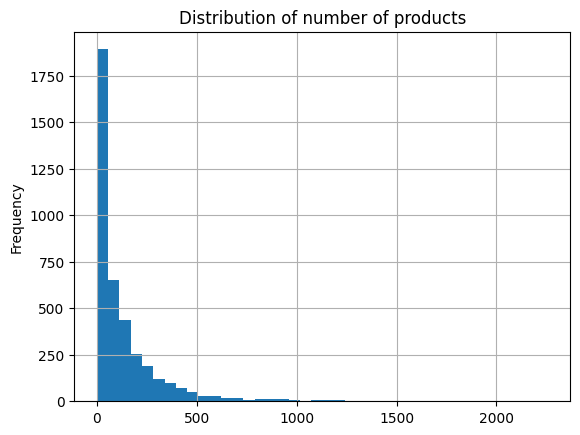

In [33]:
# Building hustogram for `count` column from products_n table
products_n['count'].plot.hist(bins=40)
plt.title('Distribution of number of products')
plt.grid()
plt.show()

We see that we just have very small number of products that are the most selling. Our histogram is skewed to the right strongle and the mean is twice more than the median. We can try to categorize our products with some text technics and extract categories from the description. Let's first remove special characters, punctuation, and convert the text to lowercase in `description` column. 

In [34]:
# Function to clean the description
def clean_description(description):
    # Remove special characters and punctuation
    cleaned_desc = re.sub(r"[^\w\s]", "", description)
    # Convert to lowercase
    cleaned_desc = cleaned_desc.lower()
    return cleaned_desc

# Apply the clean_description function to the 'description' column
products_n['description'] = products_n['description'].apply(clean_description)

#Check the result
products_n.head(10)

,stock_code,description,count
3429,85123A,white hanging heart tlight holder,2257
3408,85099B,jumbo bag red retrospot,2077
1317,22423,regency cakestand 3 tier,1878
2674,47566,party bunting,1697
174,20725,lunch bag red retrospot,1618
1599,22720,set of 3 cake tins pantry design,1456
3208,84879,assorted colour bird ornament,1437
1116,22197,popcorn holder,1406
1283,22383,lunch bag suki design,1340
176,20727,lunch bag black skull,1339


Looks good. Now let's write a function which will categorize the description and apply it to our products_n table 

In [35]:
# Define keywords and categories
keyword_category = {
    'pets': ['pet', 'animals', 'pet supplies', 'pet care'],
    'electronics': ['electronic', 'gadget', 'device', 'computer', 
                    'mobile', 'audio', 'video', 'camera', 'photo', 'console'],
    'fashion': ['fashion', 'apparel', 'clothing', 'shoes', 'footwear', 'bag', 'jewelry', 'watches'],
    'home': ['home', 'kitchen', 'furniture', 'decor', 'bedding'],
    'beauty': ['beauty', 'cosmetics', 'care', 'makeup', 'bath', 'fragrances'],
    'sports': ['sports', 'fitness', 'exercise', 'equipment', 'outdoor',  'adventure', 'gym'],
    'books': ['books', 'literature', 'reading', 'novels', 'fiction', 'periodical', 'magazine'],
    'music': ['music', 'tv', 'movie', 'album'],
    'toys': ['toys', 'games', 'play', 'children', 'lego'],
    'health': ['health', 'wellness', 'supplement', 'fitness', 'hygiene'],
    'automotive': ['automotive', 'car', 'vehicle', 'parts', 'components', 'tires',  'wheels', 'maintenance']
    
}

# Function to map description to category
def map_description_to_category(description):
    for category, keywords in keyword_category.items():
        for keyword in keywords:
            if keyword in description:
                return category
    return 'other'  # Default category if no match is found

# Apply the mapping function to create a new 'category' column
products_n['category'] = products_n['description'].apply(map_description_to_category)

# Prnt the result
products_n.head(10)

,stock_code,description,count,category
3429,85123A,white hanging heart tlight holder,2257,other
3408,85099B,jumbo bag red retrospot,2077,fashion
1317,22423,regency cakestand 3 tier,1878,other
2674,47566,party bunting,1697,other
174,20725,lunch bag red retrospot,1618,fashion
1599,22720,set of 3 cake tins pantry design,1456,other
3208,84879,assorted colour bird ornament,1437,other
1116,22197,popcorn holder,1406,other
1283,22383,lunch bag suki design,1340,fashion
176,20727,lunch bag black skull,1339,fashion


In [36]:
products_n.category.value_counts()

other          3263
fashion         189
home            169
automotive      168
toys             54
electronics      52
beauty           22
pets             14
music            11
books             6
sports            5
Name: category, dtype: int64

We still have many uncategorized items. Let's find the most common words that we have in our `description` column. We will use the NLTK library for tokenization and frequency distribution calculation. We will filter the products_n table to include only the rows where the 'category' is 'other'. Then we will concatenate the descriptions of those rows into a single string. We will tokenize the string into individual words using the word_tokenize function. Next, we will calculate the frequency distribution of the words using FreqDist and retrieve the most common N words. Finally, we will plot the most common words using plot from the FreqDist object.

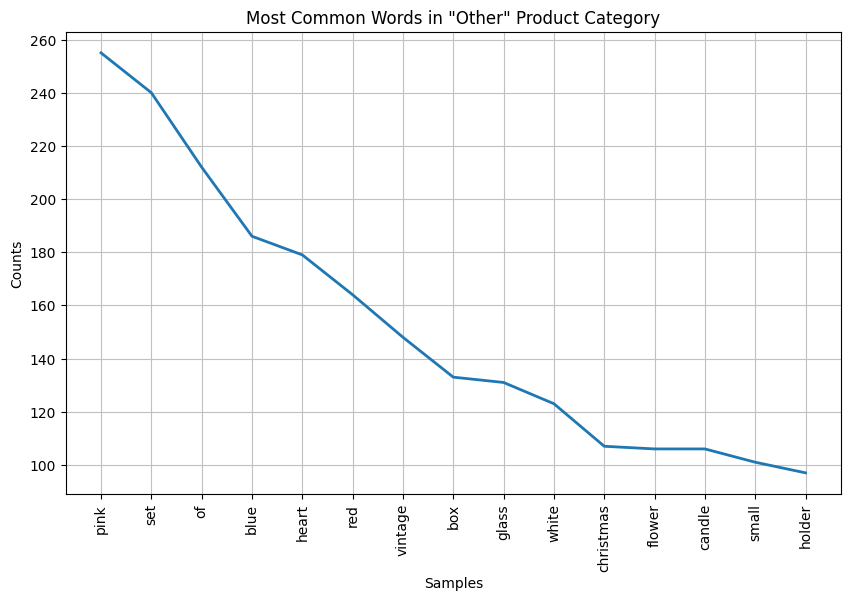

In [37]:
# Filter the DataFrame to include only 'other' category
other_products = products_n[products_n['category'] == 'other']

# Concatenate descriptions into a single string
other_descriptions = ' '.join(other_products['description'])

# Tokenize the string into individual words
words = word_tokenize(other_descriptions)

# Calculate the frequency of each word
freq_dist = FreqDist(words)

# Get the most common N words
top_n = 15
most_common_words = freq_dist.most_common(top_n)

# Plot the most common words
plt.figure(figsize=(10, 6))
freq_dist.plot(top_n, title='Most Common Words in "Other" Product Category')
plt.show()

Let's look at the descriptions that we have with these words

In [38]:
# Get the list of most common words
most_common_words = [word for word, _ in most_common_words]

# Filter the products_n DataFrame
filtered_products = products_n[(products_n['category'] == 'other') & 
                               (products_n['description'].str.contains('|'.join(most_common_words)))]

# Print the filtered DataFrame
filtered_products.head(20)

,stock_code,description,count,category
3429,85123A,white hanging heart tlight holder,2257,other
1599,22720,set of 3 cake tins pantry design,1456,other
1116,22197,popcorn holder,1406,other
443,21212,pack of 72 retrospot cake cases,1295,other
1350,22457,natural slate heart chalkboard,1273,other
1360,22469,heart of wicker small,1213,other
1823,22960,jam making set with jars,1196,other
1305,22411,jumbo shopper vintage red paisley,1194,other
1012,22086,paper chain kit 50s christmas,1179,other
1824,22961,jam making set printed,1165,other


We can add some categories to include most common words. Let's update our function and apply it again

In [39]:
# Define keywords and categories
keyword_category = {
    'pets': ['pet', 'animals', 'pet supplies', 'pet care'],
    'electronics': ['electronic', 'gadget', 'device', 'computer', 
                    'mobile', 'audio', 'video', 'camera', 'photo', 'console'],
    'fashion': ['fashion', 'apparel', 'clothing', 'shoes', 'footwear', 'bag', 'jewelry', 'watch', 'clock', 'necklace'],
    'home': ['home', 'kitchen', 'furniture', 'decor', 'bedding', 'teacup', 'light', 'bottle', 'cup', 'doormat', 'rack',
            'jug', 'warmer', 'tissue', 'hook', 'spoon', 'plate', 'napkin', 'crayon', 'apron', 'candle', 'dispenser',
             'pensil', 'pen', 'teapot', 'bowl'],
    'beauty': ['beauty', 'cosmetics', 'care', 'makeup', 'bath', 'fragrances'],
    'sports': ['sports', 'fitness', 'exercise', 'equipment', 'outdoor',  'adventure', 'gym'],
    'books': ['books', 'literature', 'reading', 'novels', 'fiction', 'periodical', 'magazine'],
    'music': ['music', 'tv', 'movie', 'album'],
    'toys': ['toy', 'game', 'play', 'children', 'lego'],
    'health': ['health', 'wellness', 'supplement', 'fitness', 'hygiene'],
    'automotive': ['automotive', 'car', 'vehicle', 'parts', 'components', 'tires',  'wheels', 'maintenance'],
    'accessories': ['tool', 'holder', 'tin', 'case',  'chalkboard', 'wicker', 'set', 'jar', 'box', 'frame', 'pantry',
                   'glass', 'retrospot', 'tier', 'ornament', 'shopper', 'kit','ribbon', 'pad', 'sign', 'cutter',
                    'holder', 'silk fan', 'money bank', 'crayon'],
    'post':['post', 'postage'],
    'construction supplies': ['board', 'cabinet', 'feltcraft', 'ladder', 'drawer'],
    'holydays': ['christmas', 'sleigh', 'bells', 'gift', 'spinning', 'love'],
    'vintage': ['vintage'], 
    'food': ['apple', 'banana', 'carrot', 'potato', 'chicken', 'beef', 'bread', 'milk', 'cheese', 'rice', 'pasta',
             'yogurt', 'salad', 'pizza', 'cereal', 'marshmallow']
}

# Function to map description to category
def map_description_to_category(description):
    for category, keywords in keyword_category.items():
        for keyword in keywords:
            if keyword in description:
                return category
    return 'other'  # Default category if no match is found

# Apply the mapping function to create a new 'category' column
products_n['category'] = products_n['description'].apply(map_description_to_category)

# Prnt the result
products_n.head(10)

,stock_code,description,count,category
3429,85123A,white hanging heart tlight holder,2257,home
3408,85099B,jumbo bag red retrospot,2077,fashion
1317,22423,regency cakestand 3 tier,1878,accessories
2674,47566,party bunting,1697,accessories
174,20725,lunch bag red retrospot,1618,fashion
1599,22720,set of 3 cake tins pantry design,1456,accessories
3208,84879,assorted colour bird ornament,1437,accessories
1116,22197,popcorn holder,1406,accessories
1283,22383,lunch bag suki design,1340,fashion
176,20727,lunch bag black skull,1339,fashion


In [40]:
products_n.category.value_counts()

other                    1298
home                      912
accessories               806
fashion                   339
automotive                157
holydays                  123
construction supplies      70
vintage                    58
toys                       57
electronics                52
food                       21
beauty                     21
pets                       14
music                      11
post                        7
sports                      5
books                       2
Name: category, dtype: int64

Anyway our other category is big. Let's find the most popular product categories

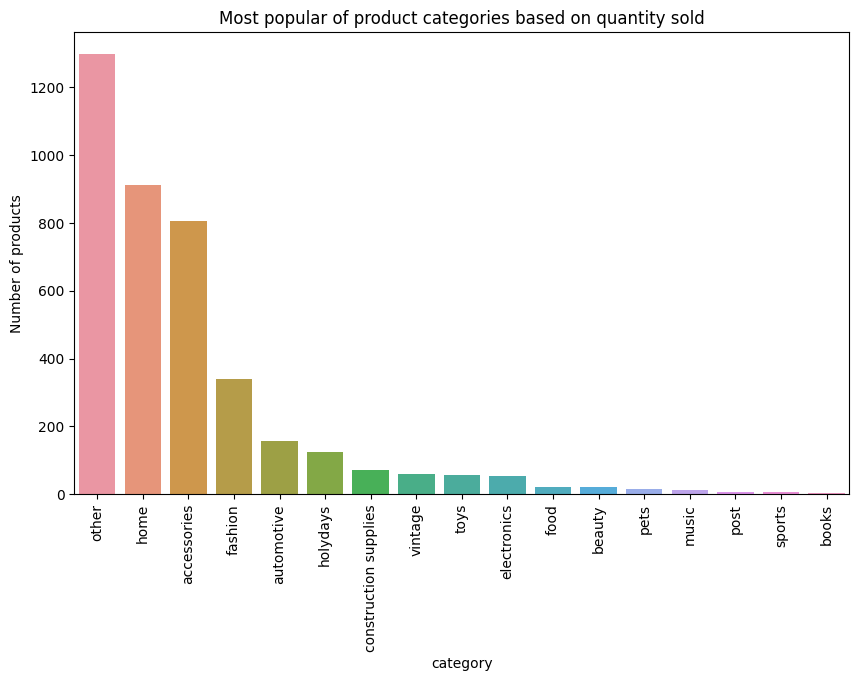

In [41]:
# Grouping products_n table to count the product categories
categories = products_n.groupby('category')['stock_code'].count().sort_values(ascending=False).reset_index()

# Building Bar plot for vizualization
plt.figure(figsize = (10,6))
sns.barplot(data=categories, x='category', y='stock_code')
plt.title('Most popular of product categories based on quantity sold')
plt.ylabel('Number of products')
plt.tick_params(axis='x', labelrotation=90)
plt.show()

We were not very lucky in product categorization, still we have the most of the products for other category. But we see that our company has a specialization as goods for home. Most of the products in 'other' category are more or less similar to home, accessories and fashion.

Mow we can calculate the revenue for our products. For each product we have the price and the quantity. So, we can find the revenue for product. Let's do this.

In [42]:
# Calculating revenue
df_filt['revenue'] = df_filt['unit_price'] * df_filt['quantity']

# Check the result

df_filt.sample(5)

C:\Users\Александр\AppData\Local\Temp\ipykernel_12420\1975500581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt['revenue'] = df_filt['unit_price'] * df_filt['quantity']


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,revenue
409150,572047,85152,HAND OVER THE CHOCOLATE SIGN,4,2019-10-18 12:13:00,2.10,8.40
318672,564837,75049L,LARGE CIRCULAR MIRROR MOBILE,4,2019-08-28 12:40:00,2.46,9.84
460789,575930,21947,SET OF 6 HEART CHOPSTICKS,2,2019-11-09 17:58:00,2.46,4.92
7493,537042,21579,LOLITA DESIGN COTTON TOTE BAG,1,2018-12-03 10:45:00,2.25,2.25
221060,556237,84944,SET OF 6 KASHMIR FOLKART BAUBLES,1,2019-06-07 15:34:00,3.29,3.29


We have successfully calculated revenue. Let's  plot a bar graph showing the top-selling products based on the quantity sold and total revenue generated.

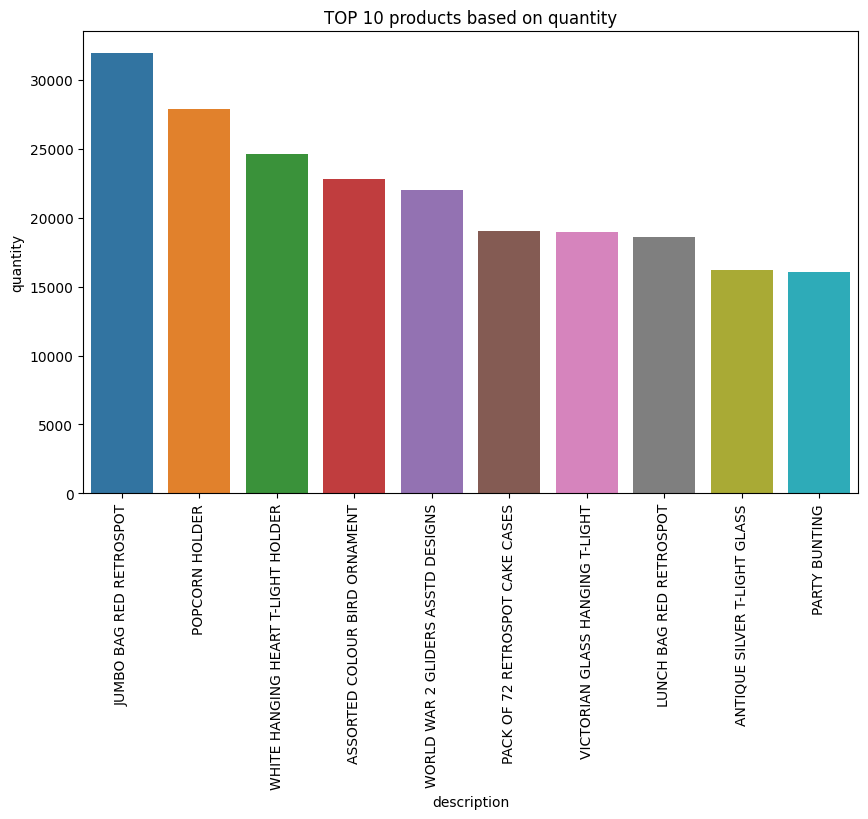

In [43]:
# Grouping the df_filt to find the top 10 products based on the quantity
top_quantity = df_filt.groupby('description')['quantity'].sum().sort_values(ascending = False).reset_index().head(10)

# Plotting a bar graph
plt.figure(figsize = (10,6))
sns.barplot(data=top_quantity, x='description', y='quantity')
plt.title('TOP 10 products based on quantity')
plt.ylabel('quantity')
plt.tick_params(axis='x', labelrotation=90)
plt.show()

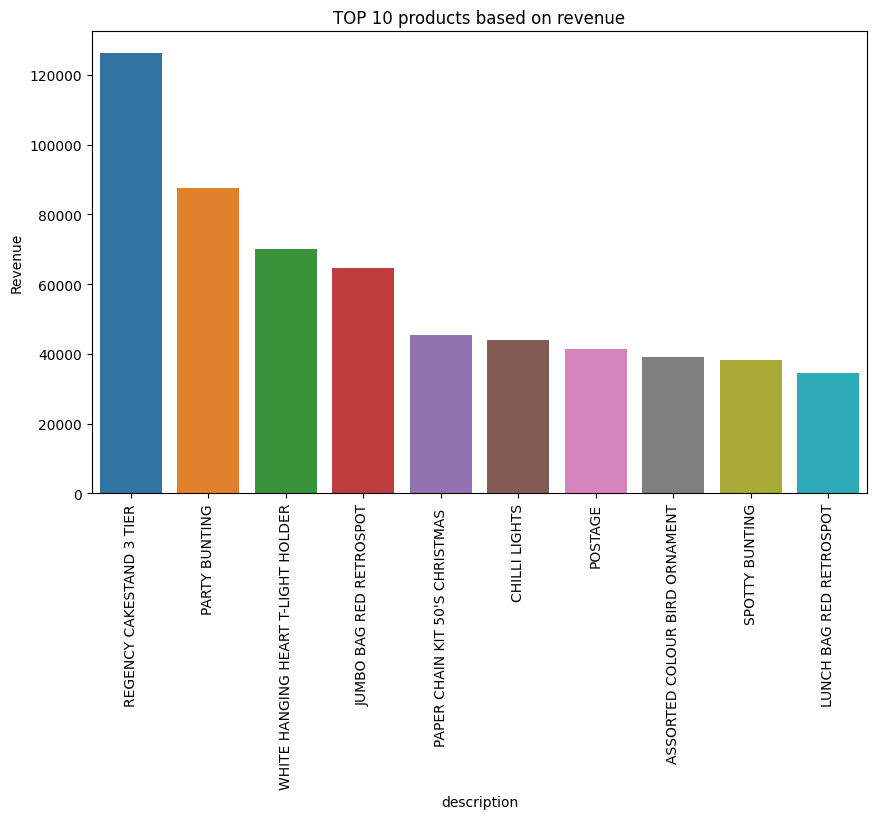

In [44]:
# Grouping the df_filt to find the top 10 products based on revenue
top_revenue = df_filt.groupby('description')['revenue'].sum().sort_values(ascending = False).reset_index().head(10)

# Plotting a bar graph
plt.figure(figsize = (10,6))
sns.barplot(data=top_revenue, x='description', y='revenue')
plt.title('TOP 10 products based on revenue')
plt.ylabel('Revenue')
plt.tick_params(axis='x', labelrotation=90)
plt.show()

We see there is a difference between the TOP products depending on the basis for the analysis. TOP product based on the revenue is REGENCY CAKESTAND 3 TIER	with the total revenue about 126000 and we don't have such product among TOP 10 based on the quantity. TOP product based on quantity is JUMBO BAG RED RETROSPOT	with the total quantity about 32000 and it is number 4 in the TOP product list based on the revenue. WE can consider this product as the most popular because it has highest combination of places in both lists. 

Let's find TOP 10 product categories based on the revenue. We will apply our clean_description function to clean the descriptions of the products, and then we will apply our map_description_to_category function to find product category in our df_clean table. After that we will group it by with the category column and sum up the revenue for each category. Finally we will plot a bar graph. 

C:\Users\Александр\AppData\Local\Temp\ipykernel_12420\2169813181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt['description'] = df_filt['description'].apply(clean_description)
C:\Users\Александр\AppData\Local\Temp\ipykernel_12420\2169813181.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt['category'] = df_filt['description'].apply(map_description_to_category)


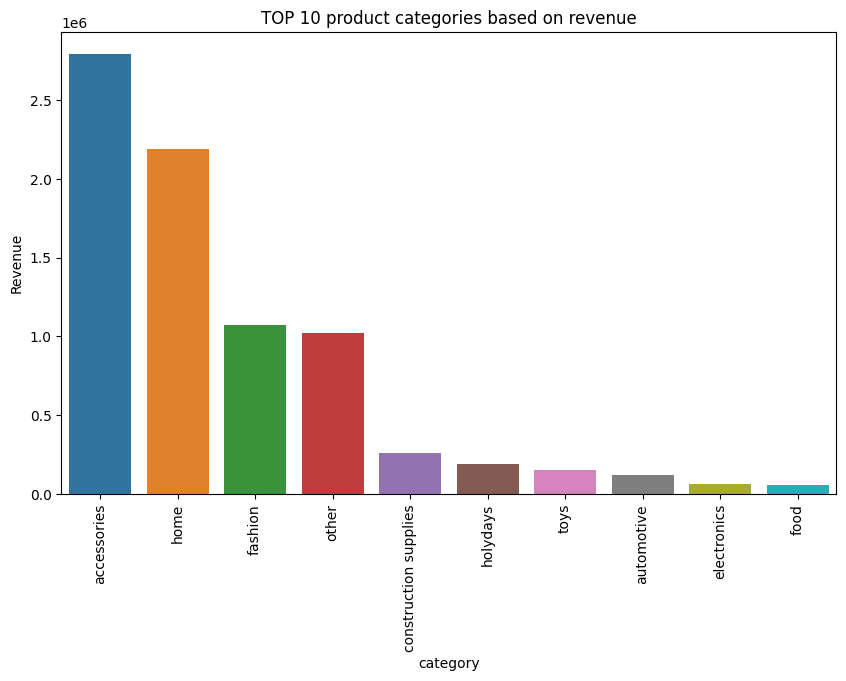

In [45]:
# Applying clean_description function
df_filt['description'] = df_filt['description'].apply(clean_description)

# Applying  map_description_to_category function to find products category for each product
df_filt['category'] = df_filt['description'].apply(map_description_to_category)

# Group by df_filt with category column and sum up the revenue for each category and finf TOP 10 categories
revenue_category = df_filt.groupby('category')['revenue'].sum().sort_values(ascending = False).reset_index().head(10)

# Plotting a bar graph
plt.figure(figsize = (10,6))
sns.barplot(data=revenue_category, x='category', y='revenue')
plt.title('TOP 10 product categories based on revenue')
plt.ylabel('Revenue')
plt.tick_params(axis='x', labelrotation=90)
plt.show()

We have our TOP 3 leaders: Accessories, home and fashion. Almost all our revenue is from that categories. We have already mentioned that we have plenty of goods in other categories but they are  more the less goods from that 3 categories. Let's calculate the share of that 3 categories including other categories. 

In [46]:
# Calculating total revenue
rev_total = df_filt.revenue.sum()
top_rev = df_filt[df_filt['category'].isin(["accessories", "home", "fashion", "other"])].revenue.sum()
# printing the results
print(f'Top 3 product categories give {top_rev/rev_total:.1%} of the total revenue')

Top 3 product categories give 86.9% of the total revenue


So we determined the most important categories which give us more than 85% of the total revenue.<br> Now let's look at hte distribution of the revenue in time. We will plot a line graph as we did  for purchases to compare if we have the same growth of the revenue. 

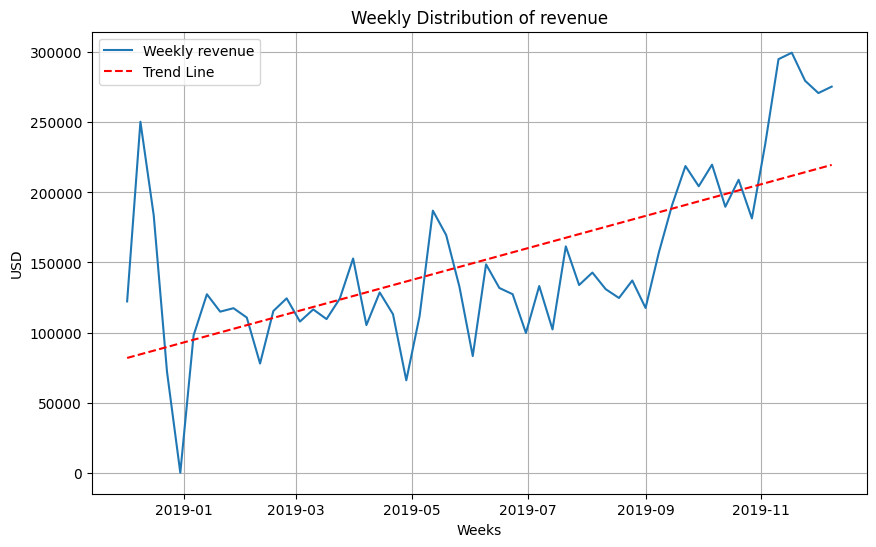

In [47]:
# Group by week and sum up the weekly revenue
revenue_counts_week = df_filt.resample('W', on='invoice_date')['revenue'].sum()

# Create line plot
plt.figure(figsize=(10, 6))
plt.plot(revenue_counts_week.index, revenue_counts_week.values, label='Weekly revenue')
plt.xlabel('Weeks')
plt.ylabel('USD')
plt.title('Weekly Distribution of revenue')
plt.xticks()
plt.grid()

# Calculate trend line
x = np.arange(len(revenue_counts_week))
y = revenue_counts_week.values
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Plot trend line
plt.plot(revenue_counts_week.index, p(x), color='red', linestyle='--', label='Trend Line')
plt.legend()

plt.show()

So. we have very similar picture. There is a Christmas peak where revenue grew up to 250000, then it drops to 0 on holidays, from January till September there were fluctuations between 80000 and 150000 and then growth up to the 200000 in October,  November.  
# Testing Statistical Hypotheses:
Let's formulate our hypotheses that we are going to check statistically.<br>

**Average price for different categories:**<br>
$H_1{0}:$ There are no significant differences in the average unit prices between different product categories.<br>
$H_1{1}:$ There are significant differences in the average unit prices between different product categories

**Correlation between quantity of items and the total revenue generated:**<br>
$H_2{0}:$ There are no significant correlation between the quantity of items and the total revenue generated<br>
$H_2{1}:$ There are significant correlation between the quantity of items and the total revenue generated.

Let's start with the first hypothesis. First we will find the average price for each category and plot a bar graph, then we will perform  the Kruskal-Wallis test, analog of Mann-Whitney U test for multiple categories

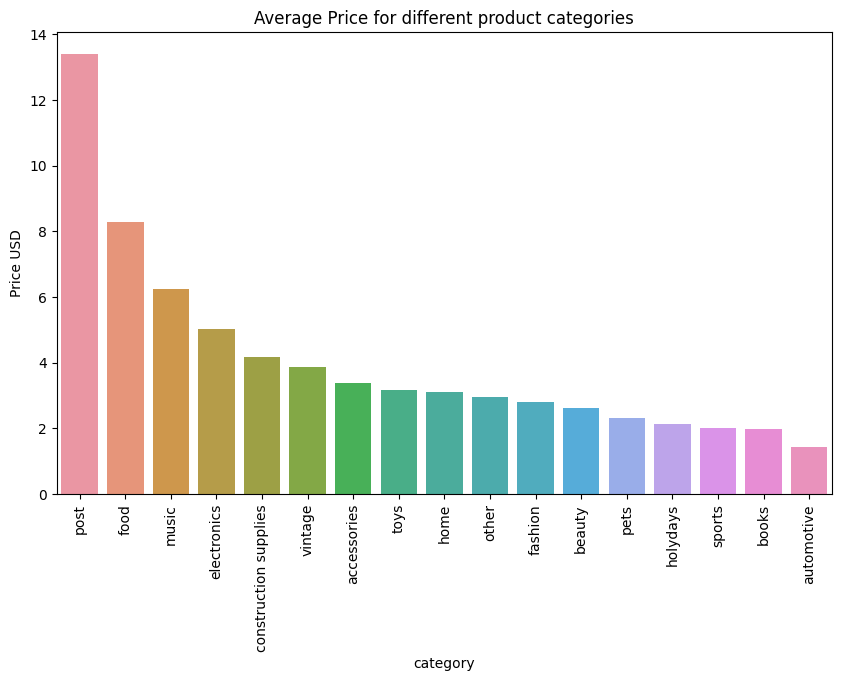

In [48]:
# Groping df_filt with category column to find average price for each category
category_avg_price = df_filt.groupby('category')['unit_price'].mean().sort_values(ascending=False).reset_index()

# Plotting a bar graph
plt.figure(figsize = (10,6))
sns.barplot(data=category_avg_price, x='category', y='unit_price')
plt.title('Average Price for different product categories')
plt.ylabel('Price USD')
plt.tick_params(axis='x', labelrotation=90)
plt.show()

We have very interesting graph. We see that there should be a difference in average prices. The most expensive categories are post, food and music where we have average price from 6 to 12 USD per unit, and our TOP product categories that bring us the most of the revenue have average prices below 4 USD. Let's check it statistically.

We need to subset the data by each product category and then perform he Kruskal-Wallis test. We will set the statistical significance parameter to 0.05 as a standard value

In [49]:
# Subset the data by each product category
categories = df_filt['category'].unique()
data_by_category = [df_filt[df_filt['category'] == category]['unit_price'] for category in categories]

# Perform Kruskal-Wallis test
statistic, p_val = st.kruskal(*data_by_category)

#Setting up statistical significancy and performing the test
alpha=0.05
    
# Check and print the result
if p_val <alpha:
    print(f'''There are significant differences in the average unit prices between different product categories.
p-value is: {p_val:.3f}
We reject null hypothesis.''')
else:
    print(f'''There are significant differences in the average unit prices between different product categories.
p-value is: {p_val:.3f}
We can not heject null gypothesis''')

There are significant differences in the average unit prices between different product categories.
p-value is: 0.000
We reject null hypothesis.


We proved that there is actually a difference in average prices between the product categories from the statistical point of view. Even p_value is 0. But we actually saw it very clear from our graph. 

Now let's check if there are significant correlation between the quantity of items and the total revenue generated. 
First let's group df_filt with the `stock_code` column  and calculate total quantity and total revenue for each item. Then we will plot a scatter plot.

In [50]:
# Calculating total revenue and total quantity for each stock_code
quantity_revenue = df_filt.groupby('stock_code').agg({'quantity':'sum', 'revenue':'sum'}).reset_index()

# calcilating correlation table
quantity_revenue.corr()

,quantity,revenue
quantity,1.000000,0.726364
revenue,0.726364,1.000000


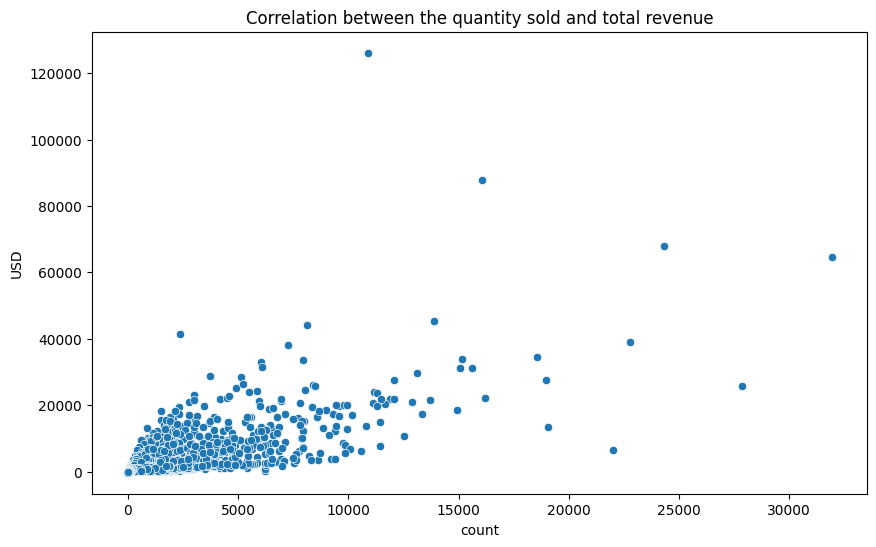

In [51]:
#Plotting scatter graph for revenue and quantity of items
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.scatterplot(data=quantity_revenue, x='quantity', y='revenue')

plt.title('Correlation between the quantity sold and total revenue')
plt.ylabel('USD')
plt.xlabel('count')
plt.show()

The correlation is not so strong, but correlation coefficient is 0,72 we can say there is a medium correlation. Let's do the same with the product categories to see if there is a difference

In [52]:
# Calculating total revenue and total quantity for each stock_code
categories_quantity_revenue = df_filt.groupby('category').agg({'quantity':'sum', 'revenue':'sum'}).reset_index()

# calcilating correlation table
categories_quantity_revenue.corr()

,quantity,revenue
quantity,1.000000,0.989027
revenue,0.989027,1.000000


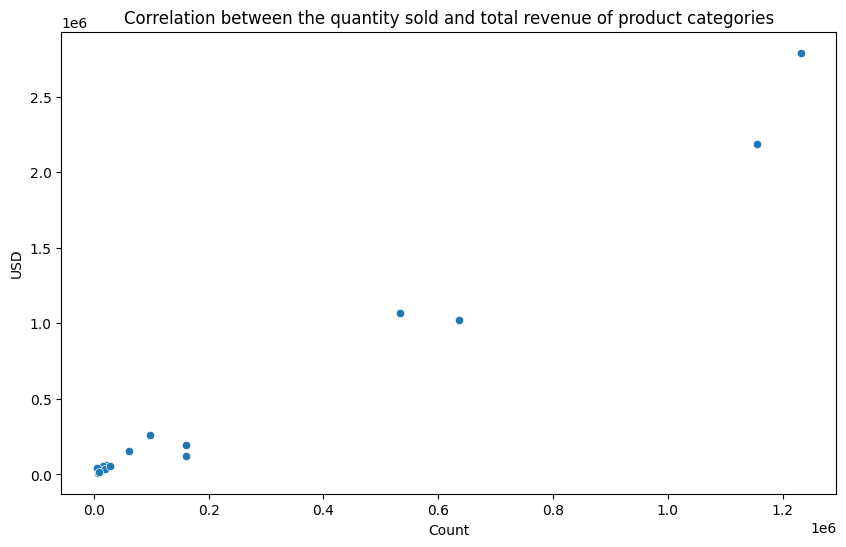

In [53]:
#PPlotting scatter graph for revenue and quantity of product categories
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.scatterplot(data=categories_quantity_revenue, x='quantity', y='revenue')

plt.title('Correlation between the quantity sold and total revenue of product categories')
plt.ylabel('USD')
plt.xlabel('Count')
plt.show()

For categories we have very strong correlation. So, even if we have high prices for some categories, the number of items sold is not big and such categories do not bring us much revenue. So, we need to expand the sales volume, it is the most important factor for company's revenue.

Let's perform a Pearson's correlation coefficient test to check the correlation between the quantity of items sold and total revenue from the statistical point of view. We will set the statistical significance parameter to 0.05 as well

In [54]:
# Calculate Pearson correlation coefficient and p-value
corr, p_val = st.pearsonr(quantity_revenue['quantity'], quantity_revenue['revenue'])

# Print correlation coefficient and p-value
print(f"Pearson correlation coefficient: {corr:.3f}")

# Check for statistical significance
alpha = 0.05
if p_val < alpha:
    print(f'''There is significant correlation between quantity of items sold and total revenue.
p-value is: {p_val:.3f}
We reject null hypothesis.''')
else:
    print(f'''There are no significant correlation between quantity of items sold and total revenue.
p-value is: {p_val:.3f}
We can not reject null hypothesis.''')


Pearson correlation coefficient: 0.726
There is significant correlation between quantity of items sold and total revenue.
p-value is: 0.000
We reject null hypothesis.


So, from the statistical point of view the correlation between the quantity of items sold and the total revenue is significant. 

# Overall conclusion
We were an Analyst of on-line store and we need to analyze the store's product range.

**The purposes of the analysis:**
- Identify the unique products, calculate the total number of unique products and explore their diversity
- Examine the top-selling products based on the quantity sold and total revenue generated
- Identify the most common product categories
- Analyze the distribution of prices across different products

We declared also a list of documents with the links which we used during the analysis.<br>
We had a **data consisted of 541909 rows and 7 columns.** During the preprocessing stage we dropped `CustomerID` column as it is not relevant for our analysis, changed the column names to lower case and added under score, changed `invoice_date` column to date time type and treated the most of the missing values in `description` column.

During the EDA we found out that there are significant anomalies in `unit_price` and `quantity` columns. We determined the boundaries near 1 and 99 percentile and filtered the data. We decided to drop the rows with anomalies During this process we lost 14773 rows, or 2.7% of the original data. So this is applicable because we still have more than 97% of the original data and the results would be relevant. <br> Analyzing the distributions of unit price and quantity we discovered that **more than a half of the items have just price about 2 USD and quantity 3. And the mean price is 3.1 USD, mean quantity is 8.** Both distributions are strongly skewed to the right. We found some 0 prices, possibly because of discounts or promotions (buy something and get a gift for example) and we had some negative quantities which can be return of some items. 

We plotted also a graph showing the weekly number of invoices in our store.  We found out that we have Christmas peak in December and then we have drop to zero in the end of the 2018 because of Holidays. Nevertheless **we saw very positive trend in the full 2019 year.** In the beginning of the January we had 5000 invoices weekly, and in November we have already 15000 invoices weekly. And the mane growth was in the autumn 2019. From January to September the number of invoice was fluctuating between 5 and 10 thousand per week, and from the September till December we wee the growth to 15000. So at least at 50%. After we plotted weekly revenue we saw very similar picture. There is a Christmas peak where revenue grew up to 250000, then it drops to 0 on holidays, from January till September there were fluctuations between 80000 and 150000 and then growth up to the 200000 in October, November.

Analyzing the product range we confirmed that we had just one description for each unique product. That means our data is of good quality. Also we saw that **there is very small number of products that are the most selling.** Our histogram, showing distribution of number of items sold is skewed to the right strongly and the mean is twice more than the median. 

We decided to analyze description and categorized our products using text analysis technics. After categorization we were lucky to make a conclusion that our company has a specialization as goods for home. Most of the products in 'other' category are more or less similar to home, accessories and fashion. which are the most popular categories based on number of items sold. When analyzing most popular categories based on revenue **we determined  our TOP 3 leaders: Accessories, home and fashion. Almost all our revenue (87%) is from that categories** ("other" category included as it is more or less goods from those categories).

After that we analyzed unique items disregarding their category. We saw there is a difference between the TOP products depending on the basis for the analysis. TOP product based on the revenue is REGENCY CAKESTAND 3 TIER with the total revenue about 126000 and we don't have such product among TOP 10 based on the quantity. **TOP product based on quantity is JUMBO BAG RED RETROSPOT** with the total quantity about 32000 and it is number 4 in the TOP product list based on the revenue. **We considered this product as the most popular because it has highest combination of places in both lists.**

Finally we  formulated hypotheses that we checked statistically.<br>

**Average price for different categories:**<br>
$H_1{0}:$ There are no significant differences in the average unit prices between different product categories.<br>
$H_1{1}:$ There are significant differences in the average unit prices between different product categories

**Correlation between quantity of items and the total revenue generated:**<br>
$H_2{0}:$ There is no significant correlation between the quantity of items and the total revenue generated<br>
$H_2{1}:$ There is significant correlation between the quantity of items and the total revenue generated.

In order to check the first hypothesis, we found the average price for each category, plotted a bar graph and performed  the Kruskal-Wallis test, analog of Mann-Whitney U test for multiple categories. **We proved that there is actually a statistical difference in average prices between the product categories.** P_value is 0. And we saw the difference in the graph clearly.

In order to check the second hypothesis, we performed  Pearson's correlation coefficient test to check the correlation between the quantity of items sold and total revenue. **We proved that the correlation between the quantity of items sold and the total revenue is statistically significant.** p-value is 0, Pearson correlation coefficient is 0.726.

**We can say that we are doing well in our on-line store. We have variety of products, but 87% of our revenue is from  TOP 3 categories: Accessories, home and fashion. We saw significant growth of revenue in 2019 year. And although there is significant differences in the average unit prices between different product categories, but there is significant correlation between the quantity of items and the total revenue generated. So, we can recommend marketing approach: to concentrate on growth in volume of sales. During the 2019 year we were lucky to do it.**